Some random thoughts
Could look at do cold winters predict lower sale prices?

I know I should look at which things have missing values but its so annoying


In [173]:
#imports
import numpy as np
import csv
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [175]:
#import csvs
# with open('Ames Real Estate Data.csv') as csvfile:
#     redata = csv.reader(csvfile)

redata = pd.read_csv('Ames Real Estate Data.csv')

hp = pd.read_csv('Ames_HousePrice.csv', index_col = 0)

/Users/carolinekeough/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [165]:
redata.head()

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4599.0,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
1,520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
2,520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4513.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
3,520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,3449.0,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
4,520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4506.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [166]:
hp.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Fireplace
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,0,NaN,True,NaN,0,3,2010,WD,Normal,1
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,NaN,True,NaN,0,2,2009,WD,Normal,0
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,NaN,True,NaN,0,11,2007,WD,Normal,0
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,0,NaN,True,NaN,0,5,2009,WD,Normal,0
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,NaN,True,NaN,0,11,2009,WD,Normal,0


In [167]:
#maybe should investigate:
#OverallQual, OverallCond, YearBuilt, CentralAir, MSZoning, LotArea

#SalePrice

#wonder if overallqual and overallcond correlate/ correlate with other things?

In [168]:
hp['OverallQual']

1      6
2      5
3      5
4      4
5      8
      ..
759    6
760    3
761    5
762    7
763    8
Name: OverallQual, Length: 2580, dtype: int64

In [169]:
print(hp.shape)
redata.shape

#ah so house prices are the ones that actually sold. But we actually have data for 22,213 homes!
#so probs we have data for like most of the homes in ames

(2580, 82)


(22213, 91)

In [143]:
hp.

SyntaxError: invalid syntax (556462273.py, line 1)

Text(0.5, 1.0, 'Sale Prices')

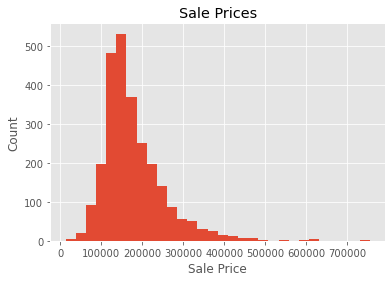

In [187]:
plt.hist(hp['SalePrice'], bins = 30)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Sale Prices')

Text(0.5, 0, 'Overall Quality Rating')

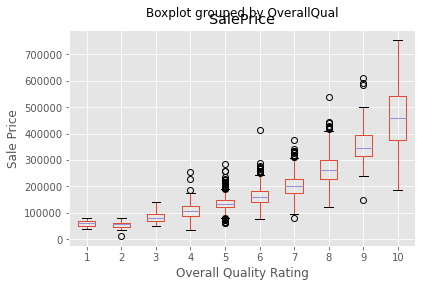

In [145]:
# hp.plot(kind = 'box',x = 'OverallQual', y = 'SalePrice')
# plt.xlabel('Overall Quality')
# plt.ylabel('Sale Price')



hp.boxplot(by = "OverallQual", column = "SalePrice")

plt.ylabel('Sale Price')
plt.xlabel('Overall Quality Rating')

Text(0.5, 0, 'Overal Condition Rating')

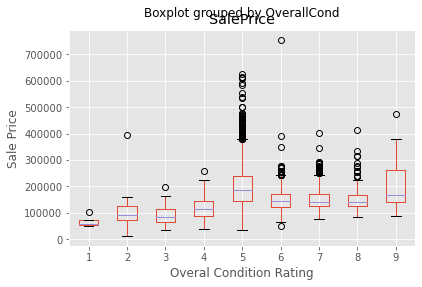

In [146]:
hp.boxplot(by = "OverallCond", column = "SalePrice")

plt.ylabel('Sale Price')
plt.xlabel('Overal Condition Rating')

#woah this one is weird. Are there a ton of 5s?

Text(0, 0.5, 'Count')

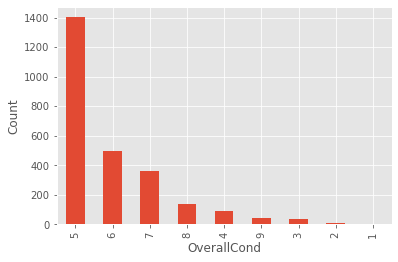

In [189]:
#Yeah there are a ton of 5s. Idk how to sort them not in this dumb order
hp['OverallCond'].value_counts().plot.bar()
plt.xlabel('OverallCond')
plt.ylabel('Count')

<AxesSubplot:ylabel='Frequency'>

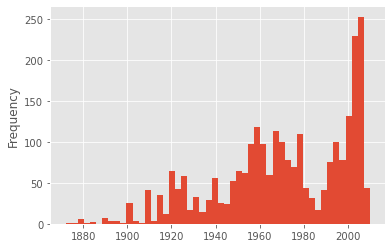

In [148]:
hp['YearBuilt'].plot.hist(bins = 50)
#can definitely see some booms. 20s, 50s and 60s, 90s and especially early 2000s

Text(0, 0.5, 'Sale Price')

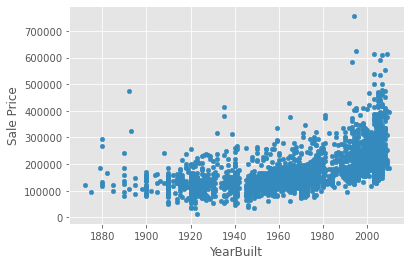

In [149]:
hp.plot(kind = 'scatter',x = 'YearBuilt', y = 'SalePrice')
plt.xlabel('YearBuilt')
plt.ylabel('Sale Price')

#seems to be a trend upwards slightly


Y    2417
N     163
Name: CentralAir, dtype: int64

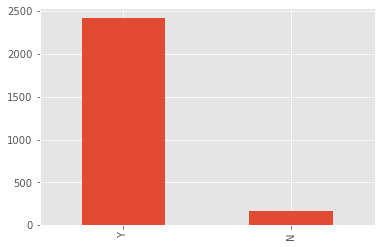

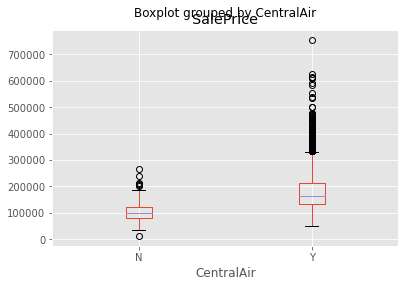

In [150]:
#Kind of obvious but just wanted to seeb
hp['CentralAir'].value_counts().plot.bar()

hp.boxplot(by = "CentralAir", column = "SalePrice")
hp['CentralAir'].value_counts()


Text(0, 0.5, 'Count')

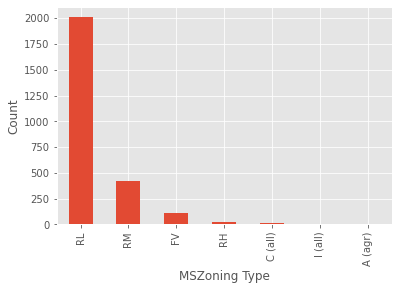

In [193]:
hp['MSZoning'].value_counts().plot.bar()

plt.xlabel('MSZoning Type')
plt.ylabel('Count')
# MSZoning: Identifies the general zoning classification of the sale.
		
#        A	Agriculture
#        C	Commercial
#        FV	Floating Village Residential
#        I	Industrial
#        RH	Residential High Density
#        RL	Residential Low Density
#        RP	Residential Low Density Park 
#        RM	Residential Medium Density

Text(0, 0.5, 'Count')

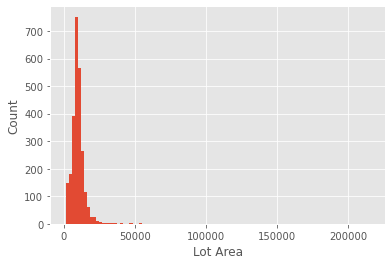

In [195]:
hp['LotArea'].hist(bins = 100)
plt.xlabel('Lot Area')
plt.ylabel('Count')
#hm looks like there is a huge outlier or mistake here. 215,245 square feet could that be right?

In [153]:
hp.sort_values(by = 'LotArea', ascending = False)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Fireplace
356,916176125,2036,375000,20,RL,150.0,215245,Pave,NaN,IR3,...,0,NaN,True,NaN,0,6,2009,WD,Normal,1
635,916125425,1786,228950,190,RL,NaN,164660,Grvl,NaN,IR1,...,0,NaN,True,Shed,700,8,2008,WD,Normal,1
250,906426060,2144,277000,50,RL,NaN,159000,Pave,NaN,IR2,...,0,NaN,True,Shed,500,6,2007,WD,Normal,1
272,905301050,1824,302000,20,RL,NaN,115149,Pave,NaN,IR2,...,0,NaN,True,NaN,0,6,2007,WD,Normal,1
139,906475200,1533,280000,20,RL,62.0,70761,Pave,NaN,IR1,...,0,NaN,True,NaN,0,12,2006,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,923228110,630,80000,180,RM,21.0,1477,Pave,NaN,Reg,...,0,NaN,True,NaN,0,4,2009,WD,Normal,0
23,923228080,1092,98000,160,RM,21.0,1477,Pave,NaN,Reg,...,0,NaN,True,NaN,0,3,2008,WD,Normal,0
649,923226250,1092,76000,160,RM,21.0,1476,Pave,NaN,Reg,...,0,NaN,True,NaN,0,3,2010,WD,Normal,0
107,923226180,630,73000,180,RM,21.0,1470,Pave,NaN,Reg,...,0,NaN,True,NaN,0,4,2006,WD,Normal,0


Text(0.5, 1.0, 'Removed outliers')

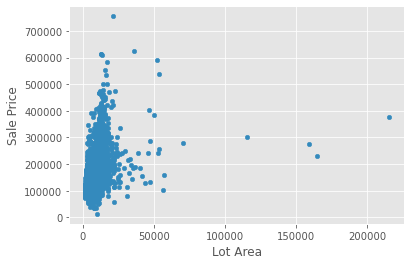

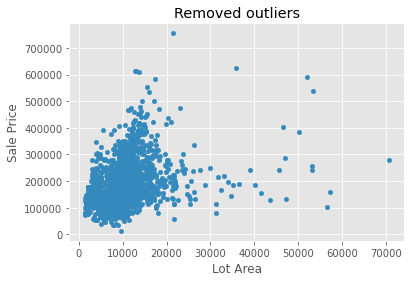

In [154]:
hp.plot(kind = 'scatter',x = 'LotArea', y = 'SalePrice')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
#ok no trend but what if i chop off the outliers over 100000 sqft

hp[hp['LotArea'] < 100000].plot(kind = 'scatter', x = 'LotArea', y = 'SalePrice')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Removed outliers')

#now there looks like more of a trend but mostly they are all just clustered around there

Text(0.5, 0, 'Neighborhood')

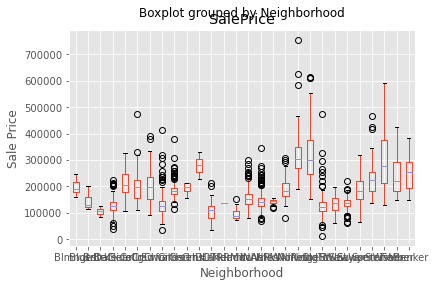

In [155]:
hp.boxplot(by = "Neighborhood", column = "SalePrice")

plt.ylabel('Sale Price')
plt.xlabel('Neighborhood')


In [156]:
# cols with null values
hp.isna().sum()[hp.isna().sum() > 0]

LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
MiscFeature     2483
dtype: int64

In [185]:
pd.set_option('max_columns', None)
hp[hp['GarageCars'].isna()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
434,910201180,1828,150909,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [157]:
hp['BsmtQual'].value_counts()
#do we want to use each "Qual" or "Cond" thing instead of the overall thing? Or see how they go together?

TA    1166
Gd    1077
Ex     188
Fa      78
Po       2
Name: BsmtQual, dtype: int64

In [158]:
quals = [x for x in hp.columns if 'Qu' in x]
quals.remove('LowQualFinSF')
quals

['OverallQual',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual']

In [159]:
conditions = [x for x in hp.columns if 'Cond' in x]
conditions = conditions[2:-1]
conditions

['OverallCond', 'ExterCond', 'BsmtCond', 'GarageCond']

In [106]:
hp.loc[:,conditions]
#  Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor

#could like assign weight to each designation. but tbh like one of the houses got a score of 9 despite TA TA and Po so...

,OverallCond,ExterCond,BsmtCond,GarageCond
1,6,TA,TA,TA
2,5,TA,TA,TA
3,9,TA,TA,Po
4,8,Gd,TA,TA
5,6,TA,TA,TA
...,...,...,...,...
759,6,TA,TA,Po
760,5,TA,NaN,TA
761,6,TA,TA,TA
762,5,TA,TA,TA


In [103]:
hp.loc[:,quals]

,OverallQual,ExterQual,BsmtQual,KitchenQual,FireplaceQu,GarageQual
1,6,TA,TA,TA,Gd,TA
2,5,Gd,Gd,Gd,NaN,TA
3,5,Gd,TA,Gd,NaN,TA
4,4,Gd,Fa,TA,NaN,TA
5,8,Gd,Gd,Gd,NaN,TA
...,...,...,...,...,...,...
759,6,TA,TA,Fa,Gd,Fa
760,3,TA,NaN,TA,Gd,TA
761,5,TA,TA,TA,NaN,TA
762,7,Gd,Gd,Gd,TA,TA


In [115]:
hp['PavedDrive'].value_counts()

Y    2336
N     184
P      60
Name: PavedDrive, dtype: int64

In [ ]:
missingRowIndexes = house_prices.LotFrontage.isnull()
# impute the value by using the above imputation_dict
house_prices.loc[missingRowIndexes,'LotFrontage'] = house_prices[missingRowIndexes].apply(\
    lambda row: imputation_dict['LotFrontage'][(row['MSSubClass'], row['Neighborhood'])], axis = 1)

In [117]:
hp.LotFrontage.isnull()

1       True
2      False
3      False
4      False
5      False
       ...  
759     True
760     True
761    False
762     True
763    False
Name: LotFrontage, Length: 2580, dtype: bool

In [118]:
hp.Utilities.value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

In [120]:
hp.Fence.value_counts()

MnPrv    301
GdPrv    111
GdWo     103
MnWw      10
Name: Fence, dtype: int64

In [176]:
hp['Fence'].value_counts()

MnPrv    301
GdPrv    111
GdWo     103
MnWw      10
Name: Fence, dtype: int64

In [177]:
[1 if len(x) >0  else 0 for x in hp['Fence']]

TypeError: object of type 'float' has no len()

In [170]:
hp.Fence

1      True
2      True
3      True
4      True
5      True
       ... 
759    True
760    True
761    True
762    True
763    True
Name: Fence, Length: 2580, dtype: bool

In [180]:
categorical = list(house_price.columns)
for feature in categorical:
    print(house_price[feature].value_counts())
    print('')

NameError: name 'value_counts' is not defined

In [182]:
hp.Street.value_counts()

Pave    2570
Grvl      10
Name: Street, dtype: int64